Filter methods select variables by assessing the “merits” of the features and ignoring the machine
learning algorithm. Filter methods usually involve a step of variable ranking and a step of feature
selection based on this ranking

Mutual information (MI) measures the mutual dependence between two random variables. The MI
“quantifies” the amount of information we can know from one variable by observing the values of
the second variable.
MI quantifies the amount of information, and as such, it has units. The units can be bits, nats, or
hartleys, as we will see in the coming paragraphs.
For many reasons, MI offers a good statistic for measuring the association between variables and
target.

• It detects any type of relationship, not just linear ones.

• MI has a straightforward interpretation: the amount of shared information between variables
is measured in, for example, bits.

• MI is insensitive to the size of the data sets (contrary to the p values derived from statistical tests
like chi-square, ANOVA, or correlation, which can be pushed arbitrarily low in large datasets,
even if the variables are slightly related).

• MI can be used with discrete and continuous predictors and discrete and continuous targets,
offering a suitable solution for most datasets.

MI is closely related to the concept of entropy. Thus, in the following sections, we will first introduce
the entropy, then explain how we calculate the entropy of a discrete variable. We will follow up
with an illustration of how we determine the MI of a pair of discrete variables. We will extend
the definition of MI for continuous variables and finally explain how we can estimate the MI for
continuous features. We will finish this chapter with a Python implementation of feature selection
based on MI.

In [18]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [3]:
data = pd.read_csv('train.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [4]:
data = data.drop_duplicates()

In [5]:
data = data.drop(columns=['number_of_elements'])

In [7]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

X_train.shape, X_test.shape

((14835, 80), (6358, 80))

In [9]:
mi = mutual_info_regression(X_train, y_train)

Text(0.5, 1.0, 'Mutual information between predictors and target')

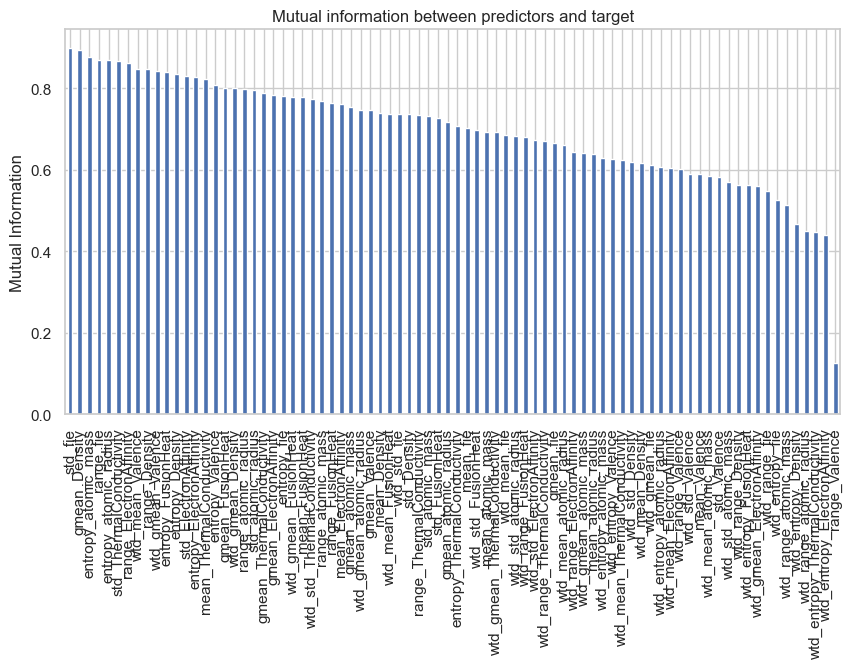

In [10]:
mi = mutual_info_regression(X_train, y_train)

# and make a bar  plot
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Mutual Information')
plt.title("Mutual information between predictors and target")

In [11]:
sel = SelectPercentile(mutual_info_regression,
                       percentile=60).fit(X_train, y_train)

# display the features
X_train.columns[sel.get_support()]

Index(['mean_atomic_mass', 'gmean_atomic_mass', 'entropy_atomic_mass',
       'range_atomic_mass', 'std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'entropy_fie', 'range_fie', 'std_fie', 'wtd_std_fie',
       'gmean_atomic_radius', 'wtd_gmean_atomic_radius',
       'entropy_atomic_radius', 'range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'range_Density', 'std_Density',
       'mean_ElectronAffinity', 'gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'range_ElectronAffinity',
       'std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_FusionHeat',
       'gmean_FusionHeat', 'wtd_gmean_FusionHeat', 'entropy_FusionHeat',
       'range_FusionHeat', 'wtd_range_FusionHeat', 'std_FusionHeat',
       'wtd_std_FusionHeat', 'mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'range_ThermalCond

In [12]:
X_train_m = sel.transform(X_train)
X_test_m = sel.transform(X_test)

In [13]:
X_train_m = pd.DataFrame(X_train, columns=sel.get_feature_names_out())
X_test_m = pd.DataFrame(X_test, columns=sel.get_feature_names_out())

X_train_m.head()

,mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,mean_fie,wtd_mean_fie,entropy_fie,range_fie,std_fie,...,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence
20297,59.626788,25.191406,1.182249,149.35206,52.574266,973.960000,889.445000,1.558655,773.0,304.625722,...,3.008254,7.361496,0.922841,78.97342,31.194431,31.075525,3.150000,2.459509,2.873807,1.494403
9059,104.365600,72.746865,1.129463,184.59060,70.392496,891.650000,1002.293227,1.328085,810.6,301.512840,...,6.313081,0.912212,0.270718,399.97342,169.524558,130.185295,2.000000,2.000000,2.000000,1.386294
7212,82.156483,68.911502,1.667846,124.90825,37.507222,738.983333,1006.655385,1.734348,786.5,267.412032,...,15.008882,1.175383,0.959607,399.97342,141.536793,158.931255,2.200000,2.884499,2.135159,1.694415
17979,55.189761,40.300849,1.314997,121.32760,44.475649,966.000000,1043.332727,1.501853,1177.5,455.142883,...,4.027907,1.131007,0.750570,399.97342,157.433022,154.638964,1.872727,1.741101,1.831121,1.581094
13928,66.959027,47.486267,0.877973,83.94930,38.874328,811.366667,875.180000,1.071221,422.1,194.175940,...,101.666732,89.027960,1.023977,86.00000,40.307154,42.922714,4.525000,4.932424,4.492567,1.085189


In [14]:
X_train_m.shape, X_test_m.shape

((14835, 48), (6358, 48))

In [19]:
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('SVR', SVR()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('XGBoost', XGBRegressor()),
    ('LightGBM', LGBMRegressor()),
    ('CatBoost', CatBoostRegressor())
]

# Определение метрик
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'R2': make_scorer(r2_score),
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'MSE': make_scorer(mean_squared_error),
}

# Оценка производительности моделей с использованием кросс-валидации
results = {}
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    results[name] = {
        'MAE': -np.mean(cv_results['test_MAE']),
        'R2': np.mean(cv_results['test_R2']),
        'RMSE': -np.mean(cv_results['test_RMSE']),
        'MSE': -np.mean(cv_results['test_MSE']),
    }

# Вывод результатов
for name, metrics in results.items():
    print(name)
    print("MAE:", metrics['MAE'])
    print("R2:", metrics['R2'])
    print("RMSE:", metrics['RMSE'])
    print("MSE:", metrics['MSE'])
    print()

Learning rate set to 0.064033
0:	learn: 30.0542984	total: 163ms	remaining: 2m 43s
1:	learn: 28.7186718	total: 186ms	remaining: 1m 32s
2:	learn: 27.4512122	total: 204ms	remaining: 1m 7s
3:	learn: 26.3317269	total: 220ms	remaining: 54.9s
4:	learn: 25.3257717	total: 232ms	remaining: 46.2s
5:	learn: 24.2797872	total: 243ms	remaining: 40.3s
6:	learn: 23.3412860	total: 256ms	remaining: 36.3s
7:	learn: 22.5035568	total: 265ms	remaining: 32.8s
8:	learn: 21.6958942	total: 275ms	remaining: 30.3s
9:	learn: 20.9651074	total: 285ms	remaining: 28.2s
10:	learn: 20.3309585	total: 294ms	remaining: 26.5s
11:	learn: 19.6859878	total: 304ms	remaining: 25.1s
12:	learn: 19.0778716	total: 314ms	remaining: 23.8s
13:	learn: 18.5443157	total: 323ms	remaining: 22.8s
14:	learn: 18.0839063	total: 332ms	remaining: 21.8s
15:	learn: 17.6194501	total: 343ms	remaining: 21.1s
16:	learn: 17.2046134	total: 352ms	remaining: 20.4s
17:	learn: 16.8601450	total: 361ms	remaining: 19.7s
18:	learn: 16.5129587	total: 371ms	remaini

165:	learn: 10.0069515	total: 1.89s	remaining: 9.48s
166:	learn: 9.9934721	total: 1.9s	remaining: 9.47s
167:	learn: 9.9788341	total: 1.91s	remaining: 9.45s
168:	learn: 9.9707389	total: 1.92s	remaining: 9.43s
169:	learn: 9.9525222	total: 1.93s	remaining: 9.41s
170:	learn: 9.9371729	total: 1.94s	remaining: 9.4s
171:	learn: 9.9304721	total: 1.95s	remaining: 9.37s
172:	learn: 9.9145911	total: 1.96s	remaining: 9.36s
173:	learn: 9.9014204	total: 1.97s	remaining: 9.34s
174:	learn: 9.8912865	total: 1.98s	remaining: 9.32s
175:	learn: 9.8769792	total: 1.99s	remaining: 9.31s
176:	learn: 9.8588636	total: 2s	remaining: 9.29s
177:	learn: 9.8459625	total: 2.01s	remaining: 9.27s
178:	learn: 9.8350310	total: 2.02s	remaining: 9.25s
179:	learn: 9.8234622	total: 2.03s	remaining: 9.23s
180:	learn: 9.8105130	total: 2.04s	remaining: 9.21s
181:	learn: 9.7943632	total: 2.04s	remaining: 9.19s
182:	learn: 9.7769668	total: 2.05s	remaining: 9.17s
183:	learn: 9.7625612	total: 2.06s	remaining: 9.15s
184:	learn: 9.75

340:	learn: 8.5002069	total: 3.56s	remaining: 6.89s
341:	learn: 8.4931623	total: 3.57s	remaining: 6.88s
342:	learn: 8.4884848	total: 3.58s	remaining: 6.86s
343:	learn: 8.4765448	total: 3.59s	remaining: 6.85s
344:	learn: 8.4708579	total: 3.6s	remaining: 6.84s
345:	learn: 8.4631132	total: 3.61s	remaining: 6.82s
346:	learn: 8.4588173	total: 3.62s	remaining: 6.81s
347:	learn: 8.4533388	total: 3.63s	remaining: 6.8s
348:	learn: 8.4480489	total: 3.64s	remaining: 6.79s
349:	learn: 8.4435017	total: 3.65s	remaining: 6.77s
350:	learn: 8.4354991	total: 3.65s	remaining: 6.76s
351:	learn: 8.4305053	total: 3.66s	remaining: 6.75s
352:	learn: 8.4279503	total: 3.67s	remaining: 6.73s
353:	learn: 8.4237413	total: 3.68s	remaining: 6.72s
354:	learn: 8.4176821	total: 3.69s	remaining: 6.71s
355:	learn: 8.4069242	total: 3.7s	remaining: 6.7s
356:	learn: 8.4040615	total: 3.71s	remaining: 6.69s
357:	learn: 8.4012425	total: 3.72s	remaining: 6.67s
358:	learn: 8.3974062	total: 3.73s	remaining: 6.66s
359:	learn: 8.39

510:	learn: 7.6822198	total: 5.24s	remaining: 5.01s
511:	learn: 7.6802676	total: 5.25s	remaining: 5s
512:	learn: 7.6753267	total: 5.26s	remaining: 5s
513:	learn: 7.6705961	total: 5.27s	remaining: 4.99s
514:	learn: 7.6676518	total: 5.28s	remaining: 4.97s
515:	learn: 7.6647772	total: 5.29s	remaining: 4.96s
516:	learn: 7.6602330	total: 5.3s	remaining: 4.95s
517:	learn: 7.6528200	total: 5.31s	remaining: 4.94s
518:	learn: 7.6501010	total: 5.32s	remaining: 4.93s
519:	learn: 7.6454985	total: 5.33s	remaining: 4.92s
520:	learn: 7.6404288	total: 5.34s	remaining: 4.91s
521:	learn: 7.6361183	total: 5.35s	remaining: 4.9s
522:	learn: 7.6325001	total: 5.36s	remaining: 4.89s
523:	learn: 7.6268094	total: 5.37s	remaining: 4.88s
524:	learn: 7.6221247	total: 5.38s	remaining: 4.87s
525:	learn: 7.6180079	total: 5.39s	remaining: 4.86s
526:	learn: 7.6161609	total: 5.4s	remaining: 4.85s
527:	learn: 7.6139271	total: 5.41s	remaining: 4.84s
528:	learn: 7.6117163	total: 5.42s	remaining: 4.83s
529:	learn: 7.6100760

680:	learn: 7.1258121	total: 6.88s	remaining: 3.22s
681:	learn: 7.1238254	total: 6.89s	remaining: 3.21s
682:	learn: 7.1212674	total: 6.9s	remaining: 3.2s
683:	learn: 7.1164583	total: 6.91s	remaining: 3.19s
684:	learn: 7.1135685	total: 6.92s	remaining: 3.18s
685:	learn: 7.1094502	total: 6.92s	remaining: 3.17s
686:	learn: 7.1073236	total: 6.93s	remaining: 3.16s
687:	learn: 7.1057709	total: 6.94s	remaining: 3.15s
688:	learn: 7.1013144	total: 6.95s	remaining: 3.14s
689:	learn: 7.0961620	total: 6.96s	remaining: 3.13s
690:	learn: 7.0937244	total: 6.97s	remaining: 3.12s
691:	learn: 7.0918198	total: 6.98s	remaining: 3.11s
692:	learn: 7.0892452	total: 6.99s	remaining: 3.1s
693:	learn: 7.0875303	total: 7s	remaining: 3.09s
694:	learn: 7.0835156	total: 7.01s	remaining: 3.08s
695:	learn: 7.0815706	total: 7.02s	remaining: 3.06s
696:	learn: 7.0787554	total: 7.03s	remaining: 3.06s
697:	learn: 7.0725806	total: 7.04s	remaining: 3.04s
698:	learn: 7.0713306	total: 7.05s	remaining: 3.03s
699:	learn: 7.0677

854:	learn: 6.7195228	total: 8.78s	remaining: 1.49s
855:	learn: 6.7174215	total: 8.79s	remaining: 1.48s
856:	learn: 6.7158344	total: 8.8s	remaining: 1.47s
857:	learn: 6.7132480	total: 8.82s	remaining: 1.46s
858:	learn: 6.7098238	total: 8.83s	remaining: 1.45s
859:	learn: 6.7082937	total: 8.84s	remaining: 1.44s
860:	learn: 6.7062318	total: 8.85s	remaining: 1.43s
861:	learn: 6.7038532	total: 8.86s	remaining: 1.42s
862:	learn: 6.6993481	total: 8.87s	remaining: 1.41s
863:	learn: 6.6978585	total: 8.88s	remaining: 1.4s
864:	learn: 6.6960880	total: 8.89s	remaining: 1.39s
865:	learn: 6.6945223	total: 8.9s	remaining: 1.38s
866:	learn: 6.6931020	total: 8.91s	remaining: 1.37s
867:	learn: 6.6905578	total: 8.93s	remaining: 1.36s
868:	learn: 6.6874987	total: 8.94s	remaining: 1.35s
869:	learn: 6.6861273	total: 8.95s	remaining: 1.34s
870:	learn: 6.6833405	total: 8.96s	remaining: 1.33s
871:	learn: 6.6823611	total: 8.97s	remaining: 1.32s
872:	learn: 6.6812866	total: 8.98s	remaining: 1.31s
873:	learn: 6.6

18:	learn: 16.6326153	total: 205ms	remaining: 10.6s
19:	learn: 16.2892950	total: 216ms	remaining: 10.6s
20:	learn: 15.9659912	total: 226ms	remaining: 10.6s
21:	learn: 15.6871303	total: 237ms	remaining: 10.5s
22:	learn: 15.4026552	total: 247ms	remaining: 10.5s
23:	learn: 15.1385122	total: 258ms	remaining: 10.5s
24:	learn: 14.9054528	total: 268ms	remaining: 10.5s
25:	learn: 14.6673449	total: 279ms	remaining: 10.5s
26:	learn: 14.4511996	total: 289ms	remaining: 10.4s
27:	learn: 14.2489815	total: 299ms	remaining: 10.4s
28:	learn: 14.0745850	total: 310ms	remaining: 10.4s
29:	learn: 13.9265578	total: 320ms	remaining: 10.4s
30:	learn: 13.7679407	total: 330ms	remaining: 10.3s
31:	learn: 13.6219649	total: 340ms	remaining: 10.3s
32:	learn: 13.4989204	total: 351ms	remaining: 10.3s
33:	learn: 13.3836267	total: 360ms	remaining: 10.2s
34:	learn: 13.2766573	total: 370ms	remaining: 10.2s
35:	learn: 13.1996077	total: 381ms	remaining: 10.2s
36:	learn: 13.0920735	total: 392ms	remaining: 10.2s
37:	learn: 1

179:	learn: 9.5249494	total: 1.85s	remaining: 8.42s
180:	learn: 9.5128172	total: 1.86s	remaining: 8.41s
181:	learn: 9.4999346	total: 1.87s	remaining: 8.4s
182:	learn: 9.4831135	total: 1.88s	remaining: 8.39s
183:	learn: 9.4711559	total: 1.89s	remaining: 8.37s
184:	learn: 9.4591042	total: 1.9s	remaining: 8.36s
185:	learn: 9.4451347	total: 1.91s	remaining: 8.34s
186:	learn: 9.4301551	total: 1.92s	remaining: 8.33s
187:	learn: 9.4158911	total: 1.93s	remaining: 8.31s
188:	learn: 9.3983577	total: 1.93s	remaining: 8.3s
189:	learn: 9.3885496	total: 1.94s	remaining: 8.29s
190:	learn: 9.3814629	total: 1.95s	remaining: 8.27s
191:	learn: 9.3711148	total: 1.96s	remaining: 8.26s
192:	learn: 9.3577104	total: 1.97s	remaining: 8.25s
193:	learn: 9.3495682	total: 1.98s	remaining: 8.24s
194:	learn: 9.3433785	total: 1.99s	remaining: 8.22s
195:	learn: 9.3396088	total: 2s	remaining: 8.21s
196:	learn: 9.3328798	total: 2.01s	remaining: 8.19s
197:	learn: 9.3177259	total: 2.02s	remaining: 8.18s
198:	learn: 9.3037

357:	learn: 8.1510554	total: 3.75s	remaining: 6.73s
358:	learn: 8.1469820	total: 3.76s	remaining: 6.72s
359:	learn: 8.1429695	total: 3.77s	remaining: 6.71s
360:	learn: 8.1389855	total: 3.78s	remaining: 6.7s
361:	learn: 8.1305663	total: 3.79s	remaining: 6.69s
362:	learn: 8.1244289	total: 3.81s	remaining: 6.68s
363:	learn: 8.1170286	total: 3.81s	remaining: 6.67s
364:	learn: 8.1124101	total: 3.83s	remaining: 6.66s
365:	learn: 8.1027829	total: 3.83s	remaining: 6.64s
366:	learn: 8.1010669	total: 3.85s	remaining: 6.63s
367:	learn: 8.0953062	total: 3.85s	remaining: 6.62s
368:	learn: 8.0896596	total: 3.86s	remaining: 6.61s
369:	learn: 8.0828908	total: 3.87s	remaining: 6.6s
370:	learn: 8.0779842	total: 3.88s	remaining: 6.58s
371:	learn: 8.0739952	total: 3.9s	remaining: 6.58s
372:	learn: 8.0712102	total: 3.9s	remaining: 6.57s
373:	learn: 8.0661230	total: 3.92s	remaining: 6.55s
374:	learn: 8.0587390	total: 3.93s	remaining: 6.54s
375:	learn: 8.0571325	total: 3.94s	remaining: 6.53s
376:	learn: 8.05

516:	learn: 7.4543862	total: 5.43s	remaining: 5.07s
517:	learn: 7.4480034	total: 5.44s	remaining: 5.06s
518:	learn: 7.4430538	total: 5.45s	remaining: 5.05s
519:	learn: 7.4397702	total: 5.46s	remaining: 5.04s
520:	learn: 7.4385097	total: 5.47s	remaining: 5.03s
521:	learn: 7.4314095	total: 5.48s	remaining: 5.02s
522:	learn: 7.4284593	total: 5.49s	remaining: 5.01s
523:	learn: 7.4264920	total: 5.5s	remaining: 5s
524:	learn: 7.4245448	total: 5.51s	remaining: 4.99s
525:	learn: 7.4209846	total: 5.52s	remaining: 4.98s
526:	learn: 7.4181093	total: 5.54s	remaining: 4.97s
527:	learn: 7.4163301	total: 5.55s	remaining: 4.96s
528:	learn: 7.4120386	total: 5.56s	remaining: 4.95s
529:	learn: 7.4087621	total: 5.57s	remaining: 4.94s
530:	learn: 7.4065613	total: 5.58s	remaining: 4.93s
531:	learn: 7.4028818	total: 5.59s	remaining: 4.92s
532:	learn: 7.3984405	total: 5.6s	remaining: 4.91s
533:	learn: 7.3957399	total: 5.61s	remaining: 4.9s
534:	learn: 7.3924408	total: 5.62s	remaining: 4.89s
535:	learn: 7.3903

687:	learn: 6.9433203	total: 7.77s	remaining: 3.52s
688:	learn: 6.9409058	total: 7.78s	remaining: 3.51s
689:	learn: 6.9367358	total: 7.79s	remaining: 3.5s
690:	learn: 6.9351971	total: 7.8s	remaining: 3.49s
691:	learn: 6.9335890	total: 7.81s	remaining: 3.48s
692:	learn: 6.9306719	total: 7.82s	remaining: 3.47s
693:	learn: 6.9285210	total: 7.83s	remaining: 3.45s
694:	learn: 6.9270125	total: 7.85s	remaining: 3.44s
695:	learn: 6.9240753	total: 7.86s	remaining: 3.43s
696:	learn: 6.9217234	total: 7.87s	remaining: 3.42s
697:	learn: 6.9188261	total: 7.88s	remaining: 3.41s
698:	learn: 6.9165689	total: 7.89s	remaining: 3.4s
699:	learn: 6.9141271	total: 7.9s	remaining: 3.39s
700:	learn: 6.9114310	total: 7.91s	remaining: 3.37s
701:	learn: 6.9092575	total: 7.92s	remaining: 3.36s
702:	learn: 6.9074177	total: 7.93s	remaining: 3.35s
703:	learn: 6.9052024	total: 7.95s	remaining: 3.34s
704:	learn: 6.9027568	total: 7.96s	remaining: 3.33s
705:	learn: 6.9009920	total: 7.96s	remaining: 3.32s
706:	learn: 6.89

859:	learn: 6.5572958	total: 10.1s	remaining: 1.65s
860:	learn: 6.5548581	total: 10.1s	remaining: 1.64s
861:	learn: 6.5535315	total: 10.1s	remaining: 1.62s
862:	learn: 6.5513340	total: 10.2s	remaining: 1.61s
863:	learn: 6.5492180	total: 10.2s	remaining: 1.6s
864:	learn: 6.5476063	total: 10.2s	remaining: 1.59s
865:	learn: 6.5440358	total: 10.2s	remaining: 1.58s
866:	learn: 6.5428021	total: 10.2s	remaining: 1.57s
867:	learn: 6.5418894	total: 10.2s	remaining: 1.55s
868:	learn: 6.5387556	total: 10.2s	remaining: 1.54s
869:	learn: 6.5363430	total: 10.3s	remaining: 1.53s
870:	learn: 6.5354179	total: 10.3s	remaining: 1.52s
871:	learn: 6.5329889	total: 10.3s	remaining: 1.51s
872:	learn: 6.5317399	total: 10.3s	remaining: 1.5s
873:	learn: 6.5305502	total: 10.3s	remaining: 1.48s
874:	learn: 6.5299591	total: 10.3s	remaining: 1.47s
875:	learn: 6.5271664	total: 10.3s	remaining: 1.46s
876:	learn: 6.5255898	total: 10.3s	remaining: 1.45s
877:	learn: 6.5244951	total: 10.4s	remaining: 1.44s
878:	learn: 6.

18:	learn: 18.6934899	total: 223ms	remaining: 11.5s
19:	learn: 18.3244250	total: 233ms	remaining: 11.4s
20:	learn: 18.0050971	total: 243ms	remaining: 11.3s
21:	learn: 17.7175041	total: 253ms	remaining: 11.2s
22:	learn: 17.4314706	total: 262ms	remaining: 11.1s
23:	learn: 17.1493778	total: 272ms	remaining: 11.1s
24:	learn: 16.9191031	total: 281ms	remaining: 11s
25:	learn: 16.7143538	total: 291ms	remaining: 10.9s
26:	learn: 16.4834894	total: 301ms	remaining: 10.8s
27:	learn: 16.2856988	total: 310ms	remaining: 10.8s
28:	learn: 16.1198736	total: 320ms	remaining: 10.7s
29:	learn: 15.9734091	total: 330ms	remaining: 10.7s
30:	learn: 15.8431711	total: 339ms	remaining: 10.6s
31:	learn: 15.6874722	total: 349ms	remaining: 10.6s
32:	learn: 15.5399785	total: 359ms	remaining: 10.5s
33:	learn: 15.4216754	total: 369ms	remaining: 10.5s
34:	learn: 15.3012051	total: 379ms	remaining: 10.5s
35:	learn: 15.1961486	total: 389ms	remaining: 10.4s
36:	learn: 15.0993666	total: 400ms	remaining: 10.4s
37:	learn: 15.

179:	learn: 11.3028685	total: 1.86s	remaining: 8.46s
180:	learn: 11.2928916	total: 1.87s	remaining: 8.45s
181:	learn: 11.2761985	total: 1.88s	remaining: 8.44s
182:	learn: 11.2664381	total: 1.89s	remaining: 8.42s
183:	learn: 11.2578533	total: 1.9s	remaining: 8.41s
184:	learn: 11.2464905	total: 1.91s	remaining: 8.39s
185:	learn: 11.2400468	total: 1.91s	remaining: 8.38s
186:	learn: 11.2190073	total: 1.92s	remaining: 8.37s
187:	learn: 11.2045928	total: 1.93s	remaining: 8.35s
188:	learn: 11.2024728	total: 1.94s	remaining: 8.34s
189:	learn: 11.1893717	total: 1.95s	remaining: 8.32s
190:	learn: 11.1741050	total: 1.96s	remaining: 8.31s
191:	learn: 11.1643248	total: 1.97s	remaining: 8.3s
192:	learn: 11.1500582	total: 1.98s	remaining: 8.3s
193:	learn: 11.1335169	total: 1.99s	remaining: 8.29s
194:	learn: 11.1260919	total: 2s	remaining: 8.27s
195:	learn: 11.1139692	total: 2.01s	remaining: 8.26s
196:	learn: 11.1028903	total: 2.02s	remaining: 8.25s
197:	learn: 11.0940837	total: 2.03s	remaining: 8.23s

349:	learn: 9.7854265	total: 3.56s	remaining: 6.61s
350:	learn: 9.7769519	total: 3.57s	remaining: 6.6s
351:	learn: 9.7711690	total: 3.58s	remaining: 6.59s
352:	learn: 9.7679889	total: 3.59s	remaining: 6.59s
353:	learn: 9.7598692	total: 3.61s	remaining: 6.58s
354:	learn: 9.7567927	total: 3.62s	remaining: 6.57s
355:	learn: 9.7507965	total: 3.63s	remaining: 6.57s
356:	learn: 9.7405741	total: 3.64s	remaining: 6.56s
357:	learn: 9.7327699	total: 3.66s	remaining: 6.56s
358:	learn: 9.7266794	total: 3.67s	remaining: 6.55s
359:	learn: 9.7195786	total: 3.68s	remaining: 6.55s
360:	learn: 9.7121570	total: 3.69s	remaining: 6.54s
361:	learn: 9.7046356	total: 3.71s	remaining: 6.53s
362:	learn: 9.6977682	total: 3.72s	remaining: 6.52s
363:	learn: 9.6904754	total: 3.73s	remaining: 6.51s
364:	learn: 9.6842279	total: 3.74s	remaining: 6.5s
365:	learn: 9.6774419	total: 3.75s	remaining: 6.49s
366:	learn: 9.6671461	total: 3.76s	remaining: 6.49s
367:	learn: 9.6630746	total: 3.77s	remaining: 6.48s
368:	learn: 9.

510:	learn: 8.9562154	total: 5.25s	remaining: 5.02s
511:	learn: 8.9500218	total: 5.26s	remaining: 5.01s
512:	learn: 8.9457517	total: 5.27s	remaining: 5s
513:	learn: 8.9383565	total: 5.28s	remaining: 4.99s
514:	learn: 8.9325548	total: 5.29s	remaining: 4.98s
515:	learn: 8.9288167	total: 5.3s	remaining: 4.97s
516:	learn: 8.9253178	total: 5.31s	remaining: 4.96s
517:	learn: 8.9227949	total: 5.32s	remaining: 4.95s
518:	learn: 8.9191032	total: 5.33s	remaining: 4.94s
519:	learn: 8.9156066	total: 5.34s	remaining: 4.93s
520:	learn: 8.9138243	total: 5.35s	remaining: 4.92s
521:	learn: 8.9096808	total: 5.36s	remaining: 4.91s
522:	learn: 8.9059398	total: 5.37s	remaining: 4.9s
523:	learn: 8.9031310	total: 5.38s	remaining: 4.89s
524:	learn: 8.8992044	total: 5.39s	remaining: 4.88s
525:	learn: 8.8909962	total: 5.4s	remaining: 4.87s
526:	learn: 8.8876349	total: 5.41s	remaining: 4.86s
527:	learn: 8.8846196	total: 5.42s	remaining: 4.84s
528:	learn: 8.8837839	total: 5.43s	remaining: 4.83s
529:	learn: 8.8829

673:	learn: 8.3773708	total: 6.93s	remaining: 3.35s
674:	learn: 8.3749193	total: 6.94s	remaining: 3.34s
675:	learn: 8.3710985	total: 6.95s	remaining: 3.33s
676:	learn: 8.3681546	total: 6.96s	remaining: 3.32s
677:	learn: 8.3648366	total: 6.97s	remaining: 3.31s
678:	learn: 8.3609815	total: 6.98s	remaining: 3.3s
679:	learn: 8.3576516	total: 6.99s	remaining: 3.29s
680:	learn: 8.3556255	total: 7s	remaining: 3.28s
681:	learn: 8.3539036	total: 7.01s	remaining: 3.27s
682:	learn: 8.3493338	total: 7.02s	remaining: 3.26s
683:	learn: 8.3458414	total: 7.03s	remaining: 3.25s
684:	learn: 8.3443426	total: 7.04s	remaining: 3.24s
685:	learn: 8.3408897	total: 7.05s	remaining: 3.23s
686:	learn: 8.3366499	total: 7.06s	remaining: 3.21s
687:	learn: 8.3333105	total: 7.07s	remaining: 3.21s
688:	learn: 8.3319702	total: 7.08s	remaining: 3.19s
689:	learn: 8.3315579	total: 7.09s	remaining: 3.18s
690:	learn: 8.3296588	total: 7.1s	remaining: 3.17s
691:	learn: 8.3265425	total: 7.11s	remaining: 3.16s
692:	learn: 8.325

838:	learn: 7.9535598	total: 8.61s	remaining: 1.65s
839:	learn: 7.9517957	total: 8.62s	remaining: 1.64s
840:	learn: 7.9503543	total: 8.63s	remaining: 1.63s
841:	learn: 7.9480210	total: 8.64s	remaining: 1.62s
842:	learn: 7.9462377	total: 8.65s	remaining: 1.61s
843:	learn: 7.9422432	total: 8.66s	remaining: 1.6s
844:	learn: 7.9418302	total: 8.67s	remaining: 1.59s
845:	learn: 7.9384581	total: 8.68s	remaining: 1.58s
846:	learn: 7.9370132	total: 8.69s	remaining: 1.57s
847:	learn: 7.9333466	total: 8.7s	remaining: 1.56s
848:	learn: 7.9295272	total: 8.71s	remaining: 1.55s
849:	learn: 7.9266697	total: 8.72s	remaining: 1.54s
850:	learn: 7.9239188	total: 8.73s	remaining: 1.53s
851:	learn: 7.9224372	total: 8.74s	remaining: 1.52s
852:	learn: 7.9190153	total: 8.75s	remaining: 1.51s
853:	learn: 7.9171757	total: 8.76s	remaining: 1.5s
854:	learn: 7.9151891	total: 8.77s	remaining: 1.49s
855:	learn: 7.9135044	total: 8.78s	remaining: 1.48s
856:	learn: 7.9121697	total: 8.79s	remaining: 1.47s
857:	learn: 7.9

Learning rate set to 0.064034
0:	learn: 33.4789966	total: 20.7ms	remaining: 20.7s
1:	learn: 32.0069566	total: 35ms	remaining: 17.5s
2:	learn: 30.7377051	total: 49.7ms	remaining: 16.5s
3:	learn: 29.5498967	total: 62.8ms	remaining: 15.6s
4:	learn: 28.4166532	total: 74.6ms	remaining: 14.9s
5:	learn: 27.3777606	total: 85.6ms	remaining: 14.2s
6:	learn: 26.4592257	total: 95.7ms	remaining: 13.6s
7:	learn: 25.6030854	total: 105ms	remaining: 13.1s
8:	learn: 24.8186942	total: 115ms	remaining: 12.7s
9:	learn: 24.0796979	total: 126ms	remaining: 12.4s
10:	learn: 23.3628214	total: 135ms	remaining: 12.2s
11:	learn: 22.6865187	total: 145ms	remaining: 11.9s
12:	learn: 22.1000097	total: 154ms	remaining: 11.7s
13:	learn: 21.5817521	total: 164ms	remaining: 11.6s
14:	learn: 21.0644563	total: 174ms	remaining: 11.4s
15:	learn: 20.6194424	total: 184ms	remaining: 11.3s
16:	learn: 20.1770087	total: 194ms	remaining: 11.2s
17:	learn: 19.8006570	total: 203ms	remaining: 11.1s
18:	learn: 19.4328541	total: 213ms	rema

159:	learn: 12.2390523	total: 1.7s	remaining: 8.91s
160:	learn: 12.2311025	total: 1.71s	remaining: 8.91s
161:	learn: 12.2108359	total: 1.72s	remaining: 8.91s
162:	learn: 12.1994499	total: 1.73s	remaining: 8.9s
163:	learn: 12.1877268	total: 1.74s	remaining: 8.89s
164:	learn: 12.1721104	total: 1.75s	remaining: 8.88s
165:	learn: 12.1647900	total: 1.76s	remaining: 8.87s
166:	learn: 12.1459461	total: 1.78s	remaining: 8.86s
167:	learn: 12.1338649	total: 1.79s	remaining: 8.85s
168:	learn: 12.1107098	total: 1.8s	remaining: 8.84s
169:	learn: 12.0944821	total: 1.81s	remaining: 8.83s
170:	learn: 12.0806731	total: 1.82s	remaining: 8.82s
171:	learn: 12.0662676	total: 1.83s	remaining: 8.81s
172:	learn: 12.0506558	total: 1.84s	remaining: 8.8s
173:	learn: 12.0335765	total: 1.85s	remaining: 8.79s
174:	learn: 12.0196004	total: 1.86s	remaining: 8.78s
175:	learn: 12.0091432	total: 1.87s	remaining: 8.77s
176:	learn: 11.9922650	total: 1.88s	remaining: 8.76s
177:	learn: 11.9780292	total: 1.89s	remaining: 8.7

322:	learn: 10.5533267	total: 3.4s	remaining: 7.13s
323:	learn: 10.5457632	total: 3.41s	remaining: 7.12s
324:	learn: 10.5384602	total: 3.42s	remaining: 7.1s
325:	learn: 10.5350663	total: 3.43s	remaining: 7.09s
326:	learn: 10.5298737	total: 3.44s	remaining: 7.08s
327:	learn: 10.5191800	total: 3.45s	remaining: 7.07s
328:	learn: 10.5126957	total: 3.46s	remaining: 7.05s
329:	learn: 10.5042899	total: 3.47s	remaining: 7.04s
330:	learn: 10.4967784	total: 3.48s	remaining: 7.03s
331:	learn: 10.4880859	total: 3.49s	remaining: 7.02s
332:	learn: 10.4809054	total: 3.5s	remaining: 7s
333:	learn: 10.4767863	total: 3.51s	remaining: 6.99s
334:	learn: 10.4714385	total: 3.52s	remaining: 6.98s
335:	learn: 10.4660589	total: 3.53s	remaining: 6.97s
336:	learn: 10.4614171	total: 3.54s	remaining: 6.96s
337:	learn: 10.4557392	total: 3.55s	remaining: 6.95s
338:	learn: 10.4438551	total: 3.56s	remaining: 6.94s
339:	learn: 10.4373774	total: 3.57s	remaining: 6.92s
340:	learn: 10.4309519	total: 3.58s	remaining: 6.92s

482:	learn: 9.6345034	total: 5.08s	remaining: 5.44s
483:	learn: 9.6302805	total: 5.09s	remaining: 5.42s
484:	learn: 9.6267657	total: 5.1s	remaining: 5.41s
485:	learn: 9.6244151	total: 5.11s	remaining: 5.4s
486:	learn: 9.6199638	total: 5.12s	remaining: 5.39s
487:	learn: 9.6187642	total: 5.13s	remaining: 5.38s
488:	learn: 9.6128128	total: 5.14s	remaining: 5.37s
489:	learn: 9.6098471	total: 5.15s	remaining: 5.36s
490:	learn: 9.6071898	total: 5.16s	remaining: 5.35s
491:	learn: 9.6028463	total: 5.17s	remaining: 5.34s
492:	learn: 9.5991678	total: 5.18s	remaining: 5.33s
493:	learn: 9.5953150	total: 5.2s	remaining: 5.32s
494:	learn: 9.5900147	total: 5.21s	remaining: 5.31s
495:	learn: 9.5876573	total: 5.22s	remaining: 5.3s
496:	learn: 9.5818966	total: 5.23s	remaining: 5.29s
497:	learn: 9.5778138	total: 5.24s	remaining: 5.28s
498:	learn: 9.5746615	total: 5.25s	remaining: 5.27s
499:	learn: 9.5715816	total: 5.26s	remaining: 5.26s
500:	learn: 9.5677639	total: 5.27s	remaining: 5.25s
501:	learn: 9.56

660:	learn: 8.9788986	total: 6.97s	remaining: 3.58s
661:	learn: 8.9747970	total: 6.98s	remaining: 3.57s
662:	learn: 8.9711457	total: 6.99s	remaining: 3.56s
663:	learn: 8.9674319	total: 7s	remaining: 3.54s
664:	learn: 8.9648209	total: 7.01s	remaining: 3.53s
665:	learn: 8.9614008	total: 7.02s	remaining: 3.52s
666:	learn: 8.9576575	total: 7.03s	remaining: 3.51s
667:	learn: 8.9537732	total: 7.04s	remaining: 3.5s
668:	learn: 8.9497459	total: 7.05s	remaining: 3.49s
669:	learn: 8.9470638	total: 7.06s	remaining: 3.48s
670:	learn: 8.9436138	total: 7.07s	remaining: 3.47s
671:	learn: 8.9383661	total: 7.08s	remaining: 3.46s
672:	learn: 8.9363292	total: 7.09s	remaining: 3.45s
673:	learn: 8.9299879	total: 7.1s	remaining: 3.44s
674:	learn: 8.9272950	total: 7.11s	remaining: 3.42s
675:	learn: 8.9230387	total: 7.12s	remaining: 3.41s
676:	learn: 8.9185757	total: 7.13s	remaining: 3.4s
677:	learn: 8.9139876	total: 7.14s	remaining: 3.39s
678:	learn: 8.9108773	total: 7.15s	remaining: 3.38s
679:	learn: 8.9076

822:	learn: 8.5259152	total: 8.66s	remaining: 1.86s
823:	learn: 8.5217269	total: 8.67s	remaining: 1.85s
824:	learn: 8.5197246	total: 8.68s	remaining: 1.84s
825:	learn: 8.5170602	total: 8.69s	remaining: 1.83s
826:	learn: 8.5156454	total: 8.7s	remaining: 1.82s
827:	learn: 8.5131799	total: 8.71s	remaining: 1.81s
828:	learn: 8.5096118	total: 8.72s	remaining: 1.8s
829:	learn: 8.5064380	total: 8.73s	remaining: 1.79s
830:	learn: 8.5012582	total: 8.74s	remaining: 1.78s
831:	learn: 8.4984880	total: 8.75s	remaining: 1.77s
832:	learn: 8.4955294	total: 8.76s	remaining: 1.75s
833:	learn: 8.4938618	total: 8.77s	remaining: 1.75s
834:	learn: 8.4894532	total: 8.78s	remaining: 1.73s
835:	learn: 8.4850866	total: 8.79s	remaining: 1.72s
836:	learn: 8.4836208	total: 8.8s	remaining: 1.71s
837:	learn: 8.4815578	total: 8.81s	remaining: 1.7s
838:	learn: 8.4789539	total: 8.82s	remaining: 1.69s
839:	learn: 8.4764395	total: 8.83s	remaining: 1.68s
840:	learn: 8.4739034	total: 8.84s	remaining: 1.67s
841:	learn: 8.47

984:	learn: 8.1599722	total: 10.3s	remaining: 157ms
985:	learn: 8.1579660	total: 10.4s	remaining: 147ms
986:	learn: 8.1541874	total: 10.4s	remaining: 137ms
987:	learn: 8.1527640	total: 10.4s	remaining: 126ms
988:	learn: 8.1516445	total: 10.4s	remaining: 116ms
989:	learn: 8.1499396	total: 10.4s	remaining: 105ms
990:	learn: 8.1468105	total: 10.4s	remaining: 94.5ms
991:	learn: 8.1448567	total: 10.4s	remaining: 84ms
992:	learn: 8.1425231	total: 10.4s	remaining: 73.5ms
993:	learn: 8.1406375	total: 10.4s	remaining: 63ms
994:	learn: 8.1393445	total: 10.4s	remaining: 52.5ms
995:	learn: 8.1377084	total: 10.5s	remaining: 42ms
996:	learn: 8.1362591	total: 10.5s	remaining: 31.5ms
997:	learn: 8.1351473	total: 10.5s	remaining: 21ms
998:	learn: 8.1330498	total: 10.5s	remaining: 10.5ms
999:	learn: 8.1325081	total: 10.5s	remaining: 0us
Learning rate set to 0.064034
0:	learn: 33.8091180	total: 20.9ms	remaining: 20.9s
1:	learn: 32.2963546	total: 37.7ms	remaining: 18.8s
2:	learn: 30.9096792	total: 52.8ms	

160:	learn: 11.4653139	total: 1.7s	remaining: 8.85s
161:	learn: 11.4527247	total: 1.71s	remaining: 8.83s
162:	learn: 11.4448578	total: 1.72s	remaining: 8.81s
163:	learn: 11.4369517	total: 1.73s	remaining: 8.8s
164:	learn: 11.4282139	total: 1.74s	remaining: 8.78s
165:	learn: 11.4223114	total: 1.74s	remaining: 8.77s
166:	learn: 11.4042187	total: 1.75s	remaining: 8.75s
167:	learn: 11.3956968	total: 1.76s	remaining: 8.74s
168:	learn: 11.3805933	total: 1.77s	remaining: 8.73s
169:	learn: 11.3728099	total: 1.78s	remaining: 8.71s
170:	learn: 11.3557307	total: 1.79s	remaining: 8.7s
171:	learn: 11.3417384	total: 1.8s	remaining: 8.69s
172:	learn: 11.3311558	total: 1.82s	remaining: 8.68s
173:	learn: 11.3224267	total: 1.83s	remaining: 8.67s
174:	learn: 11.3058310	total: 1.84s	remaining: 8.66s
175:	learn: 11.2936771	total: 1.85s	remaining: 8.65s
176:	learn: 11.2824030	total: 1.86s	remaining: 8.64s
177:	learn: 11.2708297	total: 1.87s	remaining: 8.63s
178:	learn: 11.2625249	total: 1.88s	remaining: 8.6

321:	learn: 10.0182535	total: 3.39s	remaining: 7.13s
322:	learn: 10.0079731	total: 3.4s	remaining: 7.12s
323:	learn: 9.9992433	total: 3.41s	remaining: 7.11s
324:	learn: 9.9941761	total: 3.42s	remaining: 7.1s
325:	learn: 9.9884288	total: 3.43s	remaining: 7.09s
326:	learn: 9.9783502	total: 3.44s	remaining: 7.08s
327:	learn: 9.9715454	total: 3.45s	remaining: 7.07s
328:	learn: 9.9654692	total: 3.46s	remaining: 7.05s
329:	learn: 9.9619795	total: 3.47s	remaining: 7.04s
330:	learn: 9.9562585	total: 3.48s	remaining: 7.03s
331:	learn: 9.9523493	total: 3.49s	remaining: 7.02s
332:	learn: 9.9478880	total: 3.5s	remaining: 7.01s
333:	learn: 9.9390842	total: 3.51s	remaining: 7s
334:	learn: 9.9346200	total: 3.52s	remaining: 6.99s
335:	learn: 9.9305780	total: 3.53s	remaining: 6.98s
336:	learn: 9.9215232	total: 3.54s	remaining: 6.97s
337:	learn: 9.9194416	total: 3.55s	remaining: 6.96s
338:	learn: 9.9083181	total: 3.56s	remaining: 6.95s
339:	learn: 9.9013465	total: 3.57s	remaining: 6.94s
340:	learn: 9.89

484:	learn: 9.1502145	total: 5.09s	remaining: 5.41s
485:	learn: 9.1434431	total: 5.1s	remaining: 5.4s
486:	learn: 9.1395253	total: 5.11s	remaining: 5.39s
487:	learn: 9.1370517	total: 5.12s	remaining: 5.38s
488:	learn: 9.1353619	total: 5.14s	remaining: 5.37s
489:	learn: 9.1319280	total: 5.15s	remaining: 5.36s
490:	learn: 9.1258946	total: 5.16s	remaining: 5.35s
491:	learn: 9.1221539	total: 5.17s	remaining: 5.34s
492:	learn: 9.1158840	total: 5.19s	remaining: 5.34s
493:	learn: 9.1130501	total: 5.2s	remaining: 5.33s
494:	learn: 9.1083863	total: 5.21s	remaining: 5.32s
495:	learn: 9.1046136	total: 5.22s	remaining: 5.31s
496:	learn: 9.0947152	total: 5.23s	remaining: 5.3s
497:	learn: 9.0899969	total: 5.24s	remaining: 5.29s
498:	learn: 9.0875486	total: 5.25s	remaining: 5.28s
499:	learn: 9.0838825	total: 5.26s	remaining: 5.26s
500:	learn: 9.0809305	total: 5.27s	remaining: 5.25s
501:	learn: 9.0785239	total: 5.28s	remaining: 5.24s
502:	learn: 9.0733095	total: 5.29s	remaining: 5.23s
503:	learn: 9.06

660:	learn: 8.5256025	total: 6.97s	remaining: 3.58s
661:	learn: 8.5207268	total: 6.99s	remaining: 3.57s
662:	learn: 8.5179895	total: 7s	remaining: 3.56s
663:	learn: 8.5162275	total: 7s	remaining: 3.54s
664:	learn: 8.5129980	total: 7.01s	remaining: 3.53s
665:	learn: 8.5082556	total: 7.03s	remaining: 3.52s
666:	learn: 8.5048442	total: 7.04s	remaining: 3.51s
667:	learn: 8.5001917	total: 7.04s	remaining: 3.5s
668:	learn: 8.4983754	total: 7.06s	remaining: 3.49s
669:	learn: 8.4958747	total: 7.07s	remaining: 3.48s
670:	learn: 8.4941799	total: 7.08s	remaining: 3.47s
671:	learn: 8.4867462	total: 7.09s	remaining: 3.46s
672:	learn: 8.4852168	total: 7.1s	remaining: 3.45s
673:	learn: 8.4812890	total: 7.12s	remaining: 3.44s
674:	learn: 8.4787420	total: 7.13s	remaining: 3.43s
675:	learn: 8.4755514	total: 7.14s	remaining: 3.42s
676:	learn: 8.4710163	total: 7.15s	remaining: 3.41s
677:	learn: 8.4681783	total: 7.16s	remaining: 3.4s
678:	learn: 8.4643759	total: 7.17s	remaining: 3.39s
679:	learn: 8.4621164

823:	learn: 8.0759696	total: 8.68s	remaining: 1.85s
824:	learn: 8.0740998	total: 8.69s	remaining: 1.84s
825:	learn: 8.0696013	total: 8.7s	remaining: 1.83s
826:	learn: 8.0688000	total: 8.71s	remaining: 1.82s
827:	learn: 8.0669988	total: 8.72s	remaining: 1.81s
828:	learn: 8.0638472	total: 8.73s	remaining: 1.8s
829:	learn: 8.0620970	total: 8.74s	remaining: 1.79s
830:	learn: 8.0604103	total: 8.75s	remaining: 1.78s
831:	learn: 8.0595121	total: 8.76s	remaining: 1.77s
832:	learn: 8.0567696	total: 8.78s	remaining: 1.76s
833:	learn: 8.0532697	total: 8.79s	remaining: 1.75s
834:	learn: 8.0505484	total: 8.8s	remaining: 1.74s
835:	learn: 8.0499270	total: 8.81s	remaining: 1.73s
836:	learn: 8.0457398	total: 8.82s	remaining: 1.72s
837:	learn: 8.0448856	total: 8.83s	remaining: 1.71s
838:	learn: 8.0416044	total: 8.84s	remaining: 1.7s
839:	learn: 8.0400286	total: 8.85s	remaining: 1.69s
840:	learn: 8.0365136	total: 8.86s	remaining: 1.68s
841:	learn: 8.0346437	total: 8.87s	remaining: 1.66s
842:	learn: 8.03

983:	learn: 7.7147318	total: 10.4s	remaining: 169ms
984:	learn: 7.7123626	total: 10.4s	remaining: 158ms
985:	learn: 7.7115177	total: 10.4s	remaining: 147ms
986:	learn: 7.7077189	total: 10.4s	remaining: 137ms
987:	learn: 7.7056470	total: 10.4s	remaining: 126ms
988:	learn: 7.7048658	total: 10.4s	remaining: 116ms
989:	learn: 7.7026251	total: 10.4s	remaining: 105ms
990:	learn: 7.7018341	total: 10.4s	remaining: 94.8ms
991:	learn: 7.7009177	total: 10.4s	remaining: 84.2ms
992:	learn: 7.6975728	total: 10.5s	remaining: 73.7ms
993:	learn: 7.6938438	total: 10.5s	remaining: 63.2ms
994:	learn: 7.6928662	total: 10.5s	remaining: 52.6ms
995:	learn: 7.6913030	total: 10.5s	remaining: 42.1ms
996:	learn: 7.6884318	total: 10.5s	remaining: 31.6ms
997:	learn: 7.6874874	total: 10.5s	remaining: 21.1ms
998:	learn: 7.6863090	total: 10.5s	remaining: 10.5ms
999:	learn: 7.6848467	total: 10.5s	remaining: 0us
Random Forest
MAE: -8.257269066703092
R2: 0.7422711339905893
RMSE: -12.676746223324994
MSE: -180.437173602359

In [21]:
import skopt
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt import BayesSearchCV


In [23]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_m)

X_test_sc=min_max_scaler.fit_transform(X_test_m)

In [26]:
scaler = preprocessing.MinMaxScaler()
y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_sc = scaler.fit_transform(y_test.values.reshape(-1, 1))

In [27]:
param_space = {
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_leaves': Integer(2, 50),
    'max_depth': Integer(2, 15),
    'learning_rate': Real(0.001, 1.0, 'log-uniform'),
    'n_estimators': Integer(50, 500),
    'reg_alpha': Real(0.001, 10.0, 'log-uniform'),
    'reg_lambda': Real(0.001, 10.0, 'log-uniform'),
}

# Define the model
model_2 = LGBMRegressor(random_state=42)

# Define the search algorithm
search = BayesSearchCV(
    estimator=model_2,
    search_spaces=param_space,
    n_iter=200, # Number of iterations for optimization
    scoring='neg_mean_squared_error',
    cv=15, # Number of cross-validation folds
    n_jobs=-1, # Use all available CPU cores
    verbose=0
)

# Perform the search
search.fit(X_train_sc, y_train_sc)

# Print the best hyperparameters and the corresponding MSE score
print("Best hyperparameters:", search.best_params_)
print("Best MAPE score:", -search.best_score_)

C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters: OrderedDict([('boosting_type', 'dart'), ('learning_rate', 0.508936127706215), ('max_depth', 12), ('n_estimators', 500), ('num_leaves', 50), ('reg_alpha', 0.001), ('reg_lambda', 10.0)])
Best MAPE score: 0.0043161840730540305


In [30]:
model_2 = LGBMRegressor(boosting_type='dart',learning_rate=0.508936127706215, max_depth=12,
                        n_estimators=500,num_leaves= 50,reg_alpha=  0.001,
             reg_lambda= 10.0)
model_2.fit(X_train_sc, y_train_sc)

y_pred = model_2.predict(X_test_sc)
print(r2_score(y_test_sc, y_pred))
print(mean_absolute_error(y_test_sc, y_pred))


C:\Users\Margarita\anaconda3\envs\Thesis\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7233055755985563
0.06261366720702505
